# Credit Card Recommendation

## Credit Card Recommendation in Banking

“Golden Horizon Bank” is a private bank which provides various products to its
customers, such as savings accounts, home loans, car loans, credit cards and so on.
Currently, the new manager of the bank identified that the income from credit
cards is quite low compared to the other services. He made the decision to take
some actions to increase credit card earnings. The first step he decided is to
recommend credit cards to the bank's customers rather than to new customers,
because they already have trust in the company. As the manager knows the
capability and potential of data in banking, he instructed the data science team
lead to build a model that predicts which customers are more likely to buy credit
cards and the team lead appointed you to this task. Try to build a model which
helps the bank to get maximum out of the efforts in selling more credit cards.
Good luck!

# Data Set Information:

#### Total Entries: 245,725
### Number of Columns: 11
### Column Types:
#### 4 columns of type int64 (Age, Vintage, Avg_Account_Balance, Need_Credit_Card)
#### 7 object type columns (User_ID, Gender, Area_Code, Profession, Channel_Code, Has_Credit, Is_Active)

# Important Columns:

**User_ID**: Customer ID

**Gender**: **Gender**.

**Age**: Age

**Area_Code**: Area code

**Profession**: Profession

**Channel_Code**: Channel code used

**Vintage**: Duration of the relationship with the bank

**Has_Credit**: Whether or not you have a credit card

**Avg_Account_Balance**: Average account balance

**Is_Active**: Is the account active or not?

**Need_Credit_Card**: Whether you need a credit card or not

### Basic Information & Summary

In [39]:
import pandas as pd
import numpy as np
df = pd.read_csv("credit_card_recommendation.csv")
df.info()#Info on DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245725 entries, 0 to 245724
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   User_ID              245725 non-null  object
 1   Gender               245725 non-null  object
 2   Age                  245725 non-null  int64 
 3   Area_Code            245725 non-null  object
 4   Profession           245725 non-null  object
 5   Channel_Code         245725 non-null  object
 6   Vintage              245725 non-null  int64 
 7   Has_Credit           216400 non-null  object
 8   Avg_Account_Balance  245725 non-null  int64 
 9   Is_Active            245725 non-null  object
 10  Need_Credit_Card     245725 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 20.6+ MB


In [40]:
df.head(5)

,User_ID,Gender,Age,Area_Code,Profession,Channel_Code,Vintage,Has_Credit,Avg_Account_Balance,Is_Active,Need_Credit_Card
0,NNVBBKZB,Female,73,RG268,Other,X3,43,No,1045696,No,0
1,IDD62UNG,Female,30,RG277,Salaried,X1,32,No,581988,No,0
2,HD3DSEMC,Female,56,RG268,Self_Employed,X3,26,No,1484315,Yes,0
3,BF3NC7KV,Male,34,RG270,Salaried,X1,19,No,470454,No,0
4,TEASRWXV,Female,30,RG282,Salaried,X1,33,No,886787,No,0


# Data Set Statistics & Missing Data

In [41]:
def check_data(df, head=5):
    print("######## SHAPE ########")  # (rows,columns)
    print(df.shape)
    print("######## TYPES ########")  # Data types
    print(df.dtypes)
    print("######## HEAD ########")  # First 5 lines
    print(df.head(head))
    print("######## TAIL ########")  # Last 5 lines
    print(df.tail(head))
    print("######## NaN ########")  # Check for missing values
    print(df.isnull().sum())
    print("######## DESCRIBE ########")  # Summary statistics
    print(df.describe())
    print("######## INDEX ########")  # Describe index
    print(df.index)
    print("######## COLUMNS ########")  # Describe DataFrame columns
    print(df.columns)
    print("######## COUNT ########")  # Number of non-NA values
    print(df.count())

In [42]:
check_data(df)

######## SHAPE ########
(245725, 11)
######## TYPES ########
User_ID                object
Gender                 object
Age                     int64
Area_Code              object
Profession             object
Channel_Code           object
Vintage                 int64
Has_Credit             object
Avg_Account_Balance     int64
Is_Active              object
Need_Credit_Card        int64
dtype: object
######## HEAD ########
    User_ID  Gender  Age  ... Avg_Account_Balance Is_Active Need_Credit_Card
0  NNVBBKZB  Female   73  ...             1045696        No                0
1  IDD62UNG  Female   30  ...              581988        No                0
2  HD3DSEMC  Female   56  ...             1484315       Yes                0
3  BF3NC7KV    Male   34  ...              470454        No                0
4  TEASRWXV  Female   30  ...              886787        No                0

[5 rows x 11 columns]
######## TAIL ########
         User_ID  Gender  Age  ... Avg_Account_Balance Is_Active

- Age average 43.86, minimum 23, maximum 85.
- Vintage average 46.96, minimum 7, maximum 135.
- Average Account Balance (Avg_Account_Balance) average 1,128,403.10, minimum 20,790, maximum 10,352,009.
- Need for Credit Card (Need_Credit_Card) received 23.72 per cent positive responses.
- There are 29,325 missing data in the Has_Credit column.

In [43]:
# Fill missing data with average value
df['Has_Credit'].fillna(df['Has_Credit'].mode()[0], inplace=True)

# Check the data set again
check_data(df)


######## SHAPE ########
(245725, 11)
######## TYPES ########
User_ID                object
Gender                 object
Age                     int64
Area_Code              object
Profession             object
Channel_Code           object
Vintage                 int64
Has_Credit             object
Avg_Account_Balance     int64
Is_Active              object
Need_Credit_Card        int64
dtype: object
######## HEAD ########
    User_ID  Gender  Age  ... Avg_Account_Balance Is_Active Need_Credit_Card
0  NNVBBKZB  Female   73  ...             1045696        No                0
1  IDD62UNG  Female   30  ...              581988        No                0
2  HD3DSEMC  Female   56  ...             1484315       Yes                0
3  BF3NC7KV    Male   34  ...              470454        No                0
4  TEASRWXV  Female   30  ...              886787        No                0

[5 rows x 11 columns]
######## TAIL ########
         User_ID  Gender  Age  ... Avg_Account_Balance Is_Active

# Visualling


#### Various visualizations are made on the data set. For example, a line chart showing average account balance by bio, an Extreme bar chart showing credit card hosting and average account balance by industry, bank relationship duration, and a scatter plot showing average account balance and credit card usage.

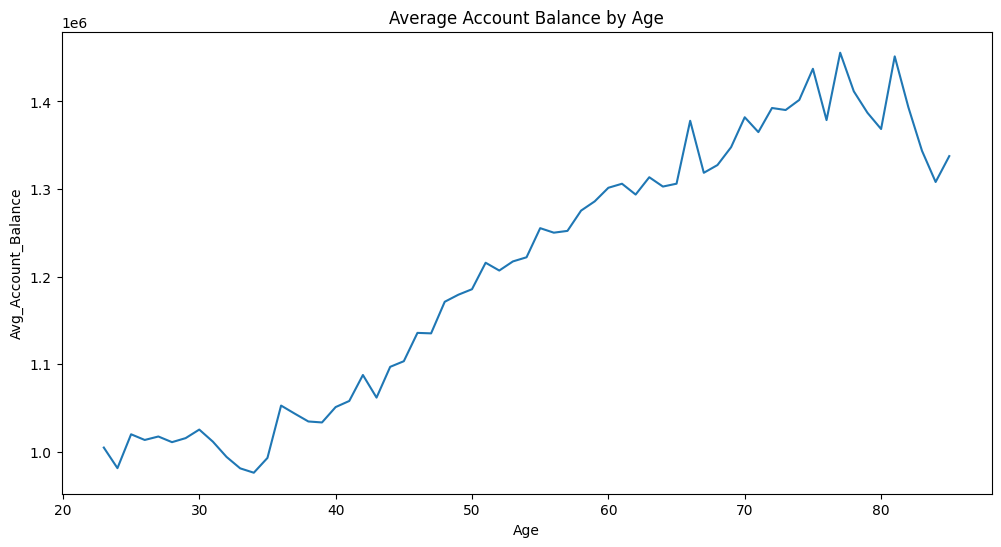

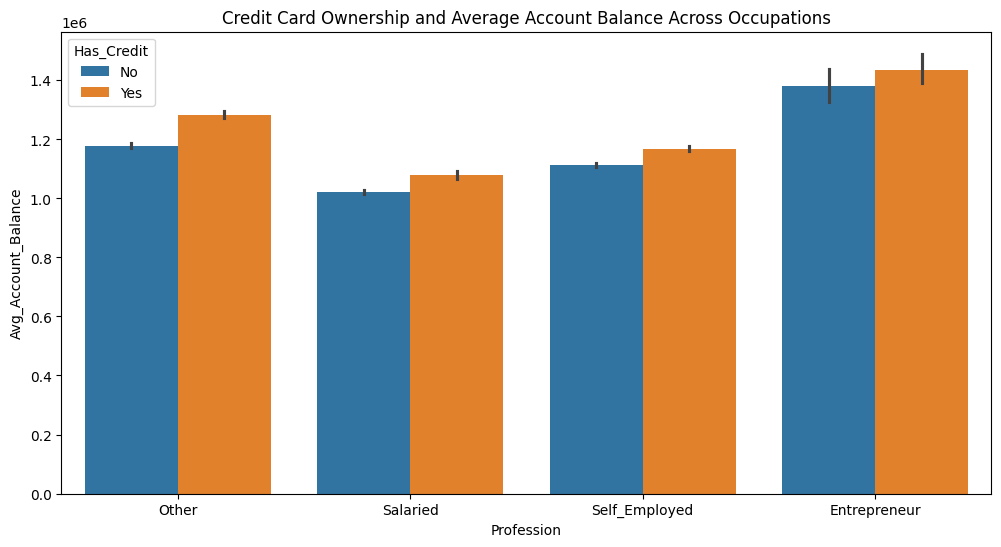

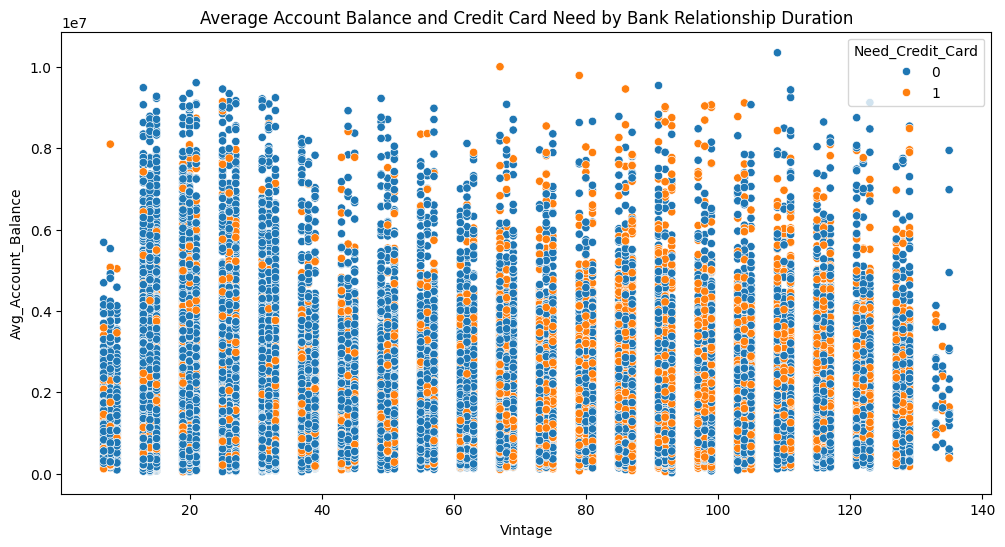

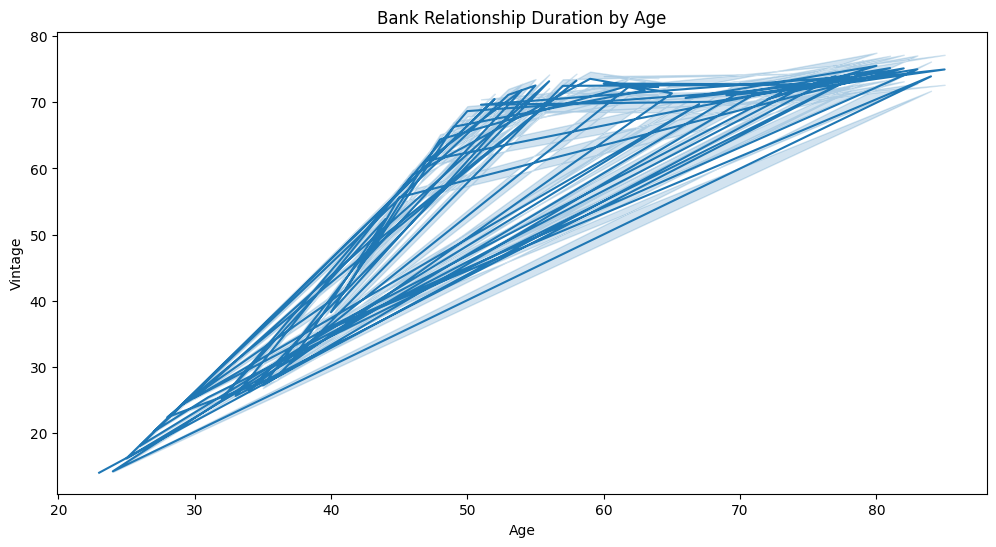

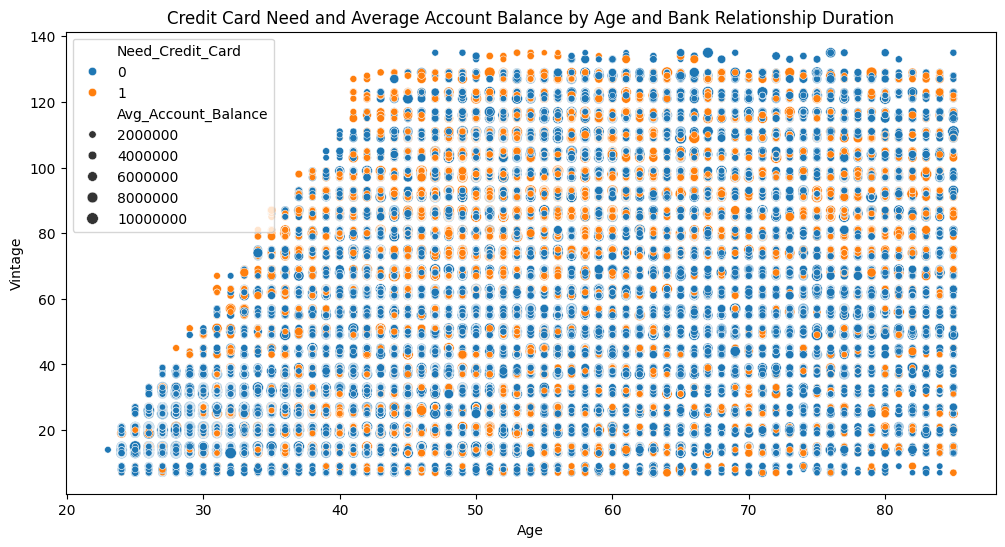

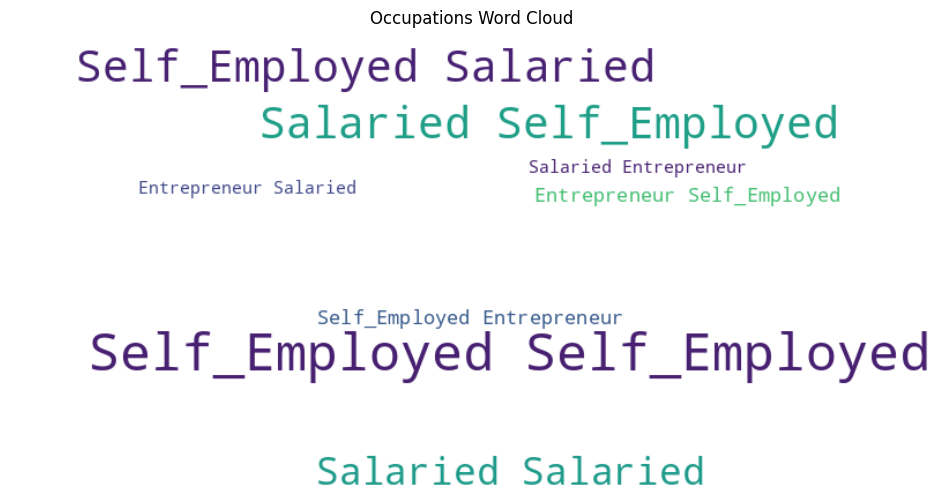

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Line Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Avg_Account_Balance', data=df, ci=None)
plt.title('Average Account Balance by Age')
plt.show()

# Stacked Bar Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Profession', y='Avg_Account_Balance', hue='Has_Credit', data=df)
plt.title('Credit Card Ownership and Average Account Balance Across Occupations')
plt.show()

# Scatter Plot
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Vintage', y='Avg_Account_Balance', hue='Need_Credit_Card', data=df)
plt.title('Average Account Balance and Credit Card Need by Bank Relationship Duration')
plt.show()

# Connected Scatter Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='Age', y='Vintage', data=df, sort=False)
plt.title('Bank Relationship Duration by Age')
plt.show()

# Bubble Graph
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Age', y='Vintage', size='Avg_Account_Balance', hue='Need_Credit_Card', data=df)
plt.title('Credit Card Need and Average Account Balance by Age and Bank Relationship Duration')
plt.show()

# Word Cloud
wordcloud = WordCloud(width=800, height=400, random_state=42, background_color='white').generate(' '.join(df['Profession']))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Occupations Word Cloud')
plt.show()

# Modelling

In [50]:
# Convert categorical columns with one-hot encoding
df_encoded = pd.get_dummies(df, columns=['Gender', 'Area_Code', 'Profession', 'Channel_Code', 'Has_Credit', 'Is_Active'])


### Feature Engineering

In [51]:
# Deriving a new feature from the combination of Age and Vintage

df_encoded['Age_Vintage'] = df_encoded['Age'] * df_encoded['Vintage']

# Log transform to Avg_Account_Balance property
df_encoded['Log_Avg_Account_Balance'] = np.log1p(df_encoded['Avg_Account_Balance'])


### Outlier Handling

In [52]:
from scipy.stats import zscore

# Detecting outliers
z_scores = zscore(df_encoded[['Age', 'Vintage', 'Avg_Account_Balance']])
abs_z_scores = np.abs(z_scores)
outliers = (abs_z_scores > 3).all(axis=1)

# Correcting or removing outliers
df_encoded_no_outliers = df_encoded[~outliers]


In [53]:
# Check for uncoded categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns
print("Categorical columns:", categorical_columns)

Categorical columns: Index(['User_ID', 'Gender', 'Area_Code', 'Profession', 'Channel_Code',
       'Has_Credit', 'Is_Active'],
      dtype='object')


In [55]:
df_encoded = pd.get_dummies(df, columns=['Gender', 'Area_Code', 'Profession', 'Channel_Code', 'Has_Credit', 'Is_Active'])


In [57]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
label_encoder = LabelEncoder()

categorical_columns = df_encoded.select_dtypes(include=['object']).columns
for col in categorical_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Data Set Preparation
X = df_encoded.drop(['Need_Credit_Card'], axis=1)
y = df_encoded['Need_Credit_Card']

# Divide the data set into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Selection and Training
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Testing the Model and Evaluating Performance
y_pred_rf = rf_model.predict(X_test)

# Evaluate model performance
print("\nRandom Forest Model:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("\nClassification Report:\n", classification_report(y_test, y_pred_rf))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))



Random Forest Model:
Accuracy: 0.7835385084952691

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.94      0.87     37520
           1       0.59      0.29      0.39     11625

    accuracy                           0.78     49145
   macro avg       0.70      0.61      0.63     49145
weighted avg       0.76      0.78      0.75     49145


Confusion Matrix:
 [[35131  2389]
 [ 8249  3376]]


The overall accuracy of the model is about 78%. However, due to class imbalance, the ability of the model to recognise class 1 (Need_Credit_Card = 1) is low (low recall). An indication of this is the low precision, recall and f1-score values for class 1.

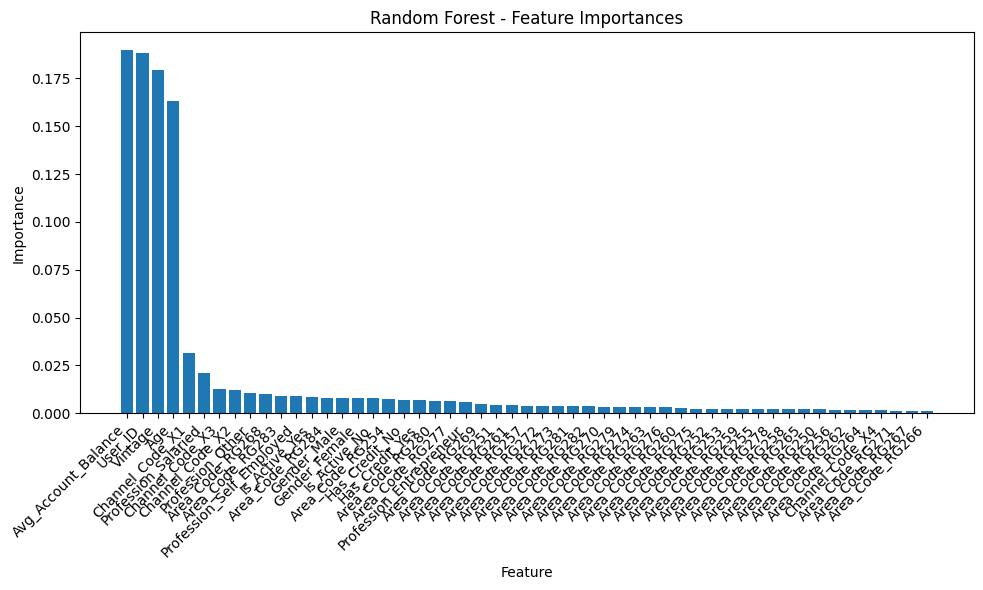

In [58]:
# Feature importances from the trained model
importances = rf_model.feature_importances_

# Feature names
feature_names = X.columns

# Sort feature importances in descending order
indices = importances.argsort()[::-1]

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(range(X.shape[1]), importances[indices], align="center")
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=45, ha="right")
plt.title("Random Forest - Feature Importances")
plt.xlabel("Feature")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
